# Práctica 3: Inferencia Bayesiana - Modelos de Evaluación

Docente: Gustavo Landfried | 
Inferencia Bayesiana Causal 1 |
1er cuatrimestre 2025 |
UNSAM

Alumno: Tomás Pablo Korenblit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import seaborn as sns
from scipy.integrate import quad
from itertools import product

# Configuración global de matplotlib
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'axes.grid': True,
    'grid.alpha': 0.3,
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.labelcolor': 'black',
    'axes.titlecolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'legend.frameon': True,
    'legend.facecolor': 'white',
    'legend.edgecolor': 'black',
    'legend.framealpha': 0.8,
    'font.size': 12,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
})

## 1. La Estructura de la Función de Costo Epistémica

En esta sección analizaremos la estructura de la función de costo epistemica y su relación con la inferencia bayesiana. La función de costo epistemica nos permite evaluar la calidad de nuestras hipótesis y actualizarlas a medida que obtenemos nuevos datos.

La estructura básica de la función de costo epistemica se puede expresar como:

$$ P(\text{Hipotesis, Datos }= \{d_1,d_2, ...\}) = P(\text{Hipotesis}) P(d_1|\text{Hipotesis}) P(d_2|d_1\text{Hipotesis}) ... $$

### Variables del problema de apuestas:

- Recompensas: $Q_c = 3, Q_s= 1.2$
- Proporción de las apuestas: $B_c = b \text{ y } B_s = 1-b$
- Recursos iniciales: $w_0$
- Recursos en la ronda i: $w_i$

In [2]:
def Wb_datos(b, datos, w0=1, Qc=3, Qs=1.2, steps=False):
    """Calcula los recursos finales dados los datos y la proporción de apuesta b"""
    if not steps:
        for d in datos:
            if d:
                w0 = w0 * b * Qc
            else:
                w0 = w0 * (1 - b) * Qs
        return w0

    if steps:
        output = [w0]
        for d in datos:
            if d:
                w0 = w0 * b * Qc
            else:
                w0 = w0 * (1 - b) * Qs
            output.append(w0)
        return output

def esperanza_Wb_datos(b, steps, w0=1, Qc=3, Qs=1.2):
    """Calcula la esperanza de los recursos para una proporción de apuesta b y número de pasos"""
    combinaciones = 2**steps
    probabilidad = 1 / combinaciones

    output = 0
    for data in product([0, 1], repeat=steps):
        output += probabilidad * Wb_datos(b, data, w0, Qc, Qs)
    return output

### 1.1 Calcular la esperanza de los recursos en los primeros dos pasos temporales con b=0.5

En esta sección calcularemos la esperanza de los recursos para los primeros dos pasos temporales, utilizando una proporción de apuesta b=0.5. Esto nos permitirá entender cómo evolucionan los recursos en promedio.

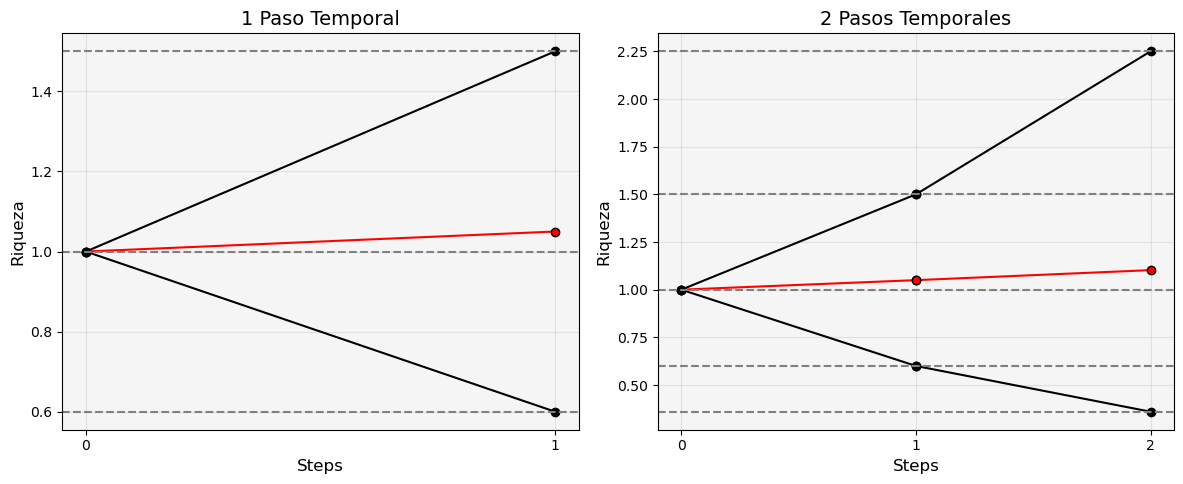

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

m0 = 1

# Primer paso temporal
axs[0].plot(
    [0, 1],
    [m0, esperanza_Wb_datos(0.5, 1)],
    color="red",
    marker="o",
    markeredgecolor="black",
)
axs[0].plot(
    [0, 1], [m0, Wb_datos(0.5, [1])], color="black", marker="o", markeredgecolor="black"
)
axs[0].plot(
    [0, 1], [m0, Wb_datos(0.5, [0])], color="black", marker="o", markeredgecolor="black"
)

axs[0].axhline(Wb_datos(0.5, [1]), color="gray", linestyle="--")
axs[0].axhline(1.0, color="gray", linestyle="--")
axs[0].axhline(Wb_datos(0.5, [0]), color="gray", linestyle="--")
axs[0].set_xticks([0, 1])

axs[0].set_title("1 Paso Temporal")
axs[0].set_xlabel("Steps")
axs[0].set_ylabel("Riqueza")

# Segundo paso temporal
axs[1].plot(
    [0, 1],
    [m0, esperanza_Wb_datos(0.5, 1)],
    color="red",
    marker="o",
    markeredgecolor="black",
)
axs[1].plot(
    [0, 1], [m0, Wb_datos(0.5, [1])], color="black", marker="o", markeredgecolor="black"
)
axs[1].plot(
    [0, 1], [m0, Wb_datos(0.5, [0])], color="black", marker="o", markeredgecolor="black"
)

axs[1].plot(
    [1, 2],
    [esperanza_Wb_datos(0.5, 1), esperanza_Wb_datos(0.5, 2)],
    color="red",
    marker="o",
    markeredgecolor="black",
)
axs[1].plot(
    [1, 2],
    [Wb_datos(0.5, [1]), Wb_datos(0.5, [1, 1])],
    color="black",
    marker="o",
    markeredgecolor="black",
)
axs[1].plot(
    [1, 2],
    [Wb_datos(0.5, [0]), Wb_datos(0.5, [0, 0])],
    color="black",
    marker="o",
    markeredgecolor="black",
)

axs[1].axhline(1.0, color="gray", linestyle="--")
axs[1].axhline(Wb_datos(0.5, [1]), color="gray", linestyle="--")
axs[1].axhline(Wb_datos(0.5, [0]), color="gray", linestyle="--")
axs[1].axhline(Wb_datos(0.5, [1, 1]), color="gray", linestyle="--")
axs[1].axhline(Wb_datos(0.5, [0, 0]), color="gray", linestyle="--")

axs[1].set_xticks([0, 1, 2])

axs[1].set_title("2 Pasos Temporales")
axs[1].set_xlabel("Steps")
axs[1].set_ylabel("Riqueza")

plt.tight_layout()
plt.show()

### 1.2 Simular 10000 personas y graficar el promedio de sus recursos

En esta sección simularemos 10000 personas y analizaremos cómo evoluciona el promedio de sus recursos en los primeros 10 pasos temporales. Esto nos permitirá verificar que la esperanza teórica coincide con el promedio empírico.

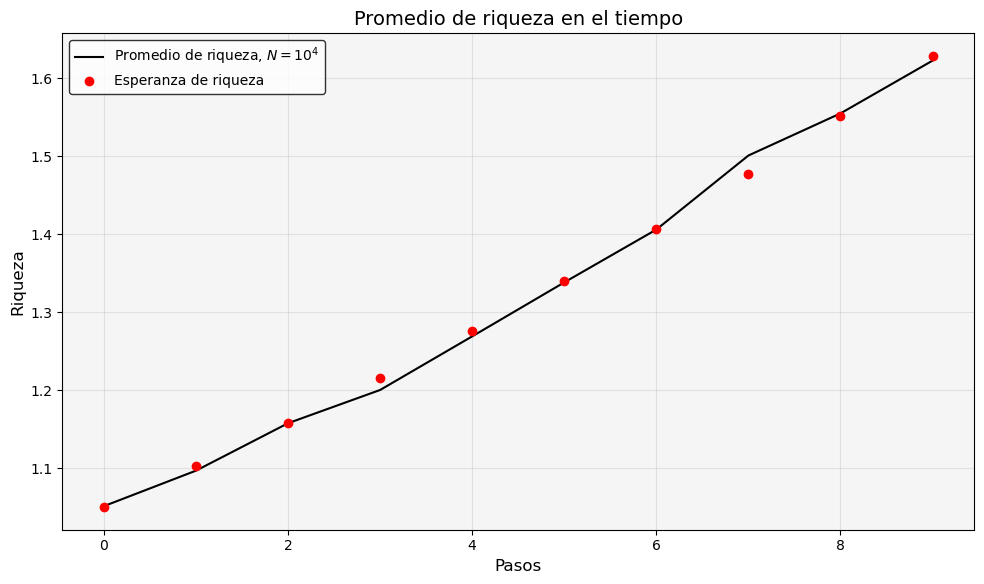

In [4]:
np.random.seed(211)

random_sample = [st.bernoulli.rvs(0.5, size=10) for _ in range(10000)]
average_over_sample_i = [
    np.mean([Wb_datos(0.5, sample[: i + 1]) for sample in random_sample])
    for i in range(10)
]

plt.plot(
    np.arange(0, 10),
    average_over_sample_i,
    color="black",
    label="Promedio de riqueza, $N=10^4$",
)
plt.plot(
    np.arange(0, 10),
    [esperanza_Wb_datos(0.5, i + 1) for i in range(10)],
    color="red",
    label="Esperanza de riqueza",
    linestyle="",
    marker="o",
)

plt.legend()
plt.xlabel("Pasos")
plt.ylabel("Riqueza")
plt.title("Promedio de riqueza en el tiempo")
plt.tight_layout()
plt.show()

### 1.3 Graficar la actualización de recursos con el tiempo

En esta sección visualizaremos cómo se actualizan los recursos con el tiempo para una apuesta determinada. Esto nos permitirá entender la dinámica del proceso y la variabilidad de los resultados.

/var/folders/dc/673xhy013nx29zy8h__xd5nw0000gn/T/ipykernel_27785/2680686385.py:9: RuntimeWarning: divide by zero encountered in log
  log_wi = np.log(Wb_datos(b_test, data, steps=True))


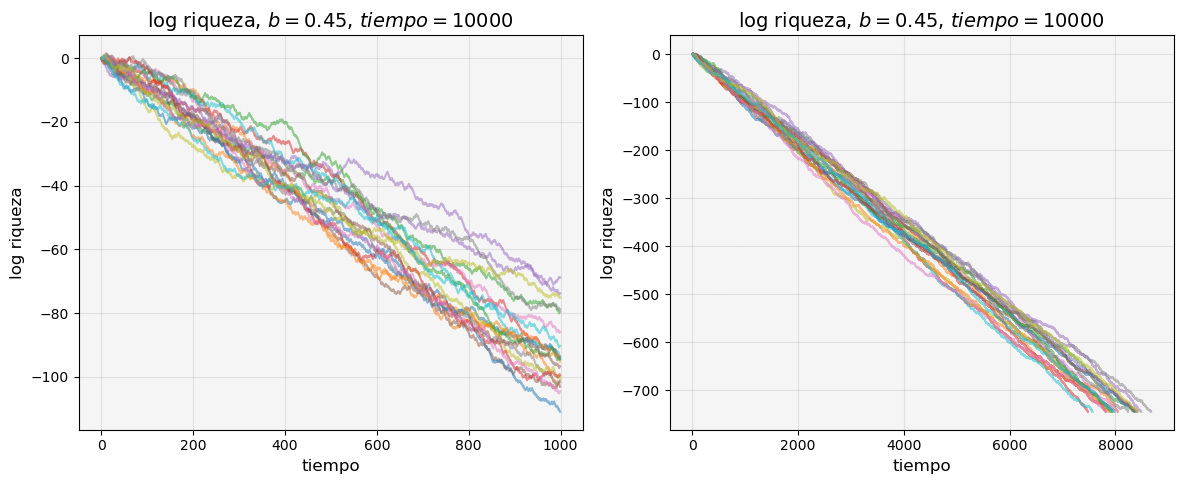

In [5]:
b_test = 0.45
steps = 10000
steps_plot1 = 1000

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for i in range(20):
    data = st.bernoulli.rvs(b_test, size=steps)
    log_wi = np.log(Wb_datos(b_test, data, steps=True))
    axs[0].plot(log_wi[0:steps_plot1], alpha=0.5)
    axs[1].plot(log_wi, alpha=0.5)

axs[0].set_title(f"log riqueza, $b={b_test}$, $tiempo = {steps}$")
axs[0].set_xlabel("tiempo")
axs[0].set_ylabel("log riqueza")
axs[1].set_title(f"log riqueza, $b={b_test}$, $tiempo = {steps}$")
axs[1].set_xlabel("tiempo")
axs[1].set_ylabel("log riqueza")

plt.tight_layout()
plt.show()

### 1.4 Tasa de crecimiento temporal

En esta sección analizaremos la tasa de crecimiento temporal de los recursos para diferentes proporciones de apuesta. Cuando $T \rightarrow \infty$, las frecuencias de los eventos observados convergen a las probabilidades de los eventos.

Para $T \rightarrow \infty$, tenemos que $n_c = n_s = 0.5 T$. Por lo tanto:

$$w_T(b) = w_0 (bQ_c)^{0.5T}((1-b)Q_s)^{0.5T}$$

Y la tasa de crecimiento:

$$r(b) = w_0 (bQ_c)^{0.5}((1-b)Q_s)^{0.5}$$

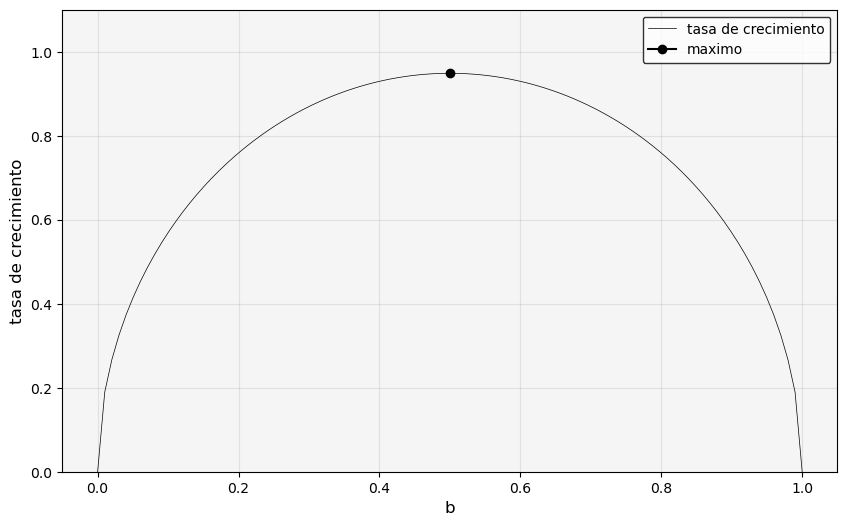

In [6]:
r = lambda x: (3 * 1.2 * x * (1 - x)) ** 0.5
x = np.linspace(0, 1, 100)

plt.plot(x, r(x), c="black", label="tasa de crecimiento", linewidth=0.5)
plt.plot(0.5, r(0.5), marker="o", c="black", label="maximo")
plt.ylim(0, 1.1)
plt.xlabel("b")
plt.ylabel("tasa de crecimiento")
plt.legend()
plt.show()

### 1.5 Apuesta óptima con pagos modificados

Analizaremos cómo se modifica la apuesta óptima cuando cambian los pagos que ofrece la casa de apuestas.

Para $T \rightarrow \infty$, tenemos:

$$w_T(b) = w_0 (bQ_c)^{0.5T}((1-b)Q_s)^{0.5T}$$

Se puede observar que la expresión es proporcional a un término $w_t(b) \sim (\sqrt{b(1-b)})^T$ que tiene un máximo en $b=0.5$ y un mínimo en $b=0$ y $b=1$. Es importante notar que aunque la tasa de crecimiento depende de los valores de $Q_c$ y $Q_s$, la apuesta óptima es siempre $b=0.5$.

### 1.6 Diferencia de desempeño entre apuestas

Calcularemos analíticamente la diferencia de desempeño entre dos apuestas b y d, dados unos pagos fijos $Q_s$ y $Q_c$.

Simplificando la expresión:

$$\frac{w_t(b)}{w_t(d)} = (\frac{b}{d})^{n_c} (\frac{(1-b)}{(1-d)})^{n_s}$$

Se puede observar que la diferencia en performance relativa entre dos apuestas $b$ y $d$ no depende de los pagos $Q_c$ y $Q_s$.

### 1.7 Diferencia de tasas de crecimiento

Calcularemos la diferencia de las tasas de crecimiento de dos apuestas b y d a largo plazo (limT →∞) expresado en escala logarítmica.

Continuando de la expresión anterior, cuando $T\rightarrow \infty$:

$$\frac{r(b)}{r(d)} = (\frac{b}{d}\frac{(1-b)}{(1-d)})^{0.5}$$

Aplicando logaritmo:

$$log(r(b)) - log(r(d)) = 0.5(log(b) - log(d) + log(1-b) - log(1-d))$$

Esta ecuación tiene la forma de la entropía cruzada $H(P, Q) = -\sum_{i} p_i \log q_i$:

$$log(r(b)) - log(r(d)) = H(P, Q_b) - H(P, Q_d)$$

Sumando y restando la entropía $H(P)$ y simplificando:

$$log(r(b)) - log(r(d)) = H(P, Q_b) - H(P, Q_d) + H(P) - H(P) = -D_{KL}(P||Q_b) + D_{KL}(P||Q_d)$$

Por lo tanto, la diferencia en la tasa logarítmica de retornos es igual a la diferencia de la divergencia KL entre las distribuciones de probabilidad $P$ y $Q$ de las apuestas $b$ y $d$ respectivamente.

Si asumimos que d = 0.5 (la apuesta óptima), entonces $D_{KL}(P||Q_d) = 0$ y:

$$log(r(b)) - log(r(0.5)) = -D_{KL}(P||Q_b)$$

Esto demuestra que la divergencia KL representa la diferencia de retornos logarítmicos entre una apuesta $b$ y la apuesta óptima.

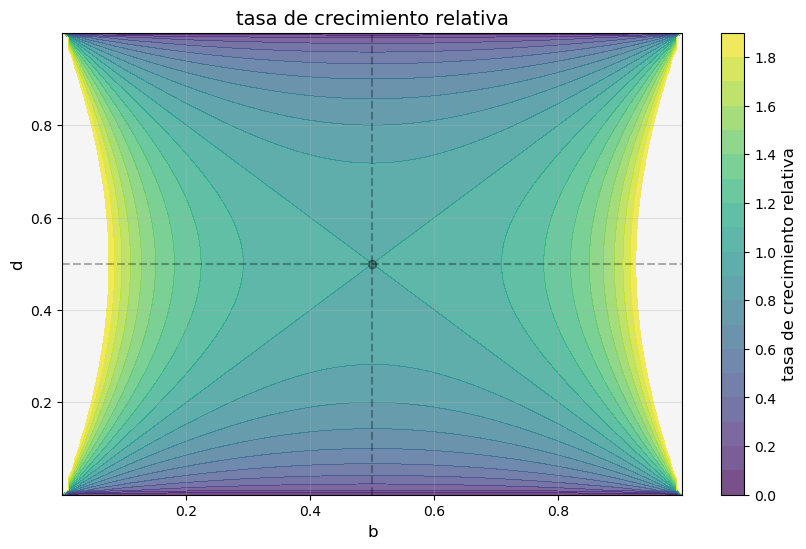

In [7]:
epsilon = 1e-6
_range = np.linspace(0 + epsilon, 1 - epsilon, 100)

def rb_rd(b, d):
    return np.sqrt((b * (1 - b)) / (d * (1 - d)))

matrix = np.array([[rb_rd(b, d) for d in _range] for b in _range])

plt.contourf(
    _range,
    _range,
    matrix,
    levels=np.arange(0, 2, 0.1),
    cmap="viridis",
    alpha=0.7,
)
plt.colorbar(label="tasa de crecimiento relativa")
plt.title("tasa de crecimiento relativa")
plt.xlabel("b")
plt.ylabel("d")

plt.axhline(0.5, color="black", linestyle="--", alpha=0.3)
plt.axvline(0.5, color="black", linestyle="--", alpha=0.3)
plt.scatter(0.5, 0.5, color="black", marker="o", alpha=0.3)
plt.show()

### 1.8 Maximización de la tasa de crecimiento

Analizaremos cuándo se maximiza la tasa de crecimiento a largo plazo.

Por lo mencionado en 1.7, maximizar la tasa de crecimiento logarítmica es equivalente a encontrar el parámetro $b$ que minimice la entropía cruzada:

$$\text{arg max}_b\ log(r(b)) = \text{arg max}_b\ \left[ p \log b + (1 - p) \log(1 - b) \right]$$

Derivando con respecto a b e igualando a cero para buscar el máximo:

$$\frac{d}{db} \left[ p \log b + (1 - p) \log(1 - b) \right] = \frac{p}{b} - \frac{1 - p}{1 - b} = 0 \Rightarrow b = p = 0.5$$

La relación con la entropía ocurre porque al elegir b de manera que se maximiza la tasa logarítmica de crecimiento, la entropía cruzada $H(P, Q_b)$ se minimiza. Es decir, $H(P, Q_b) = H(P)$ solo si $P = Q_b$ y por lo tanto b = p.

## 2. Evaluación de Procedimientos Alternativos de Medición

En esta sección analizaremos diferentes procedimientos para evaluar la calidad de mediciones alternativas, tanto para el caso de mediciones independientes como para mediciones que presentan covarianza.

### 2.1 Modelo Hui-Walter

El modelo Hui-Walter nos permite evaluar instrumentos de medición independientes. Este modelo es particularmente útil cuando no tenemos un estándar de referencia para validar nuestras mediciones.

#### Definiciones del modelo:

- Resultado sobre N pacientes: $r = (n_0, n_1, n_2, n_3)$ = (--, -+, +-, ++)
- Probabilidad de diagnóstico positivo y negativo: $q_i = (q_0, q_1, q_2, q_3)$
- Sensibilidad: $s_i$, Especificidad: $x_i$ con i representando el test
- Prevalencia de la enfermedad $p_i$ con i representando la comunidad

#### Probabilidades de $q_i$:

$$q_0 = p_c (1 - s_a) (1 - s_b) + (1 - p_c) x_a x_b$$  
$$q_1 = p_c (1 - s_a) s_b + (1 - p_c) x_a (1 - x_b)$$
$$q_2 = p_c s_a (1 - s_b) + (1 - p_c) (1 - x_a) x_b$$  
$$q_3 = p_c s_a s_b + (1 - p_c) (1 - x_a) (1 - x_b)$$

#### Distribuciones a priori:

$$p(p_c) = Beta(p_c|\alpha_p, \beta_p)$$
$$p(s_t) = Beta(s_t|\alpha_s, \beta_s)$$
$$p(x_t) = Beta(x_t|\alpha_x, \beta_x)$$

In [8]:
# ... existing code ...

### 2.1.1 Generación de datos sintéticos

En esta sección generaremos datos sintéticos para dos tests sobre 5 comunidades diferentes. Esto nos permitirá validar el modelo Hui-Walter y analizar su comportamiento.

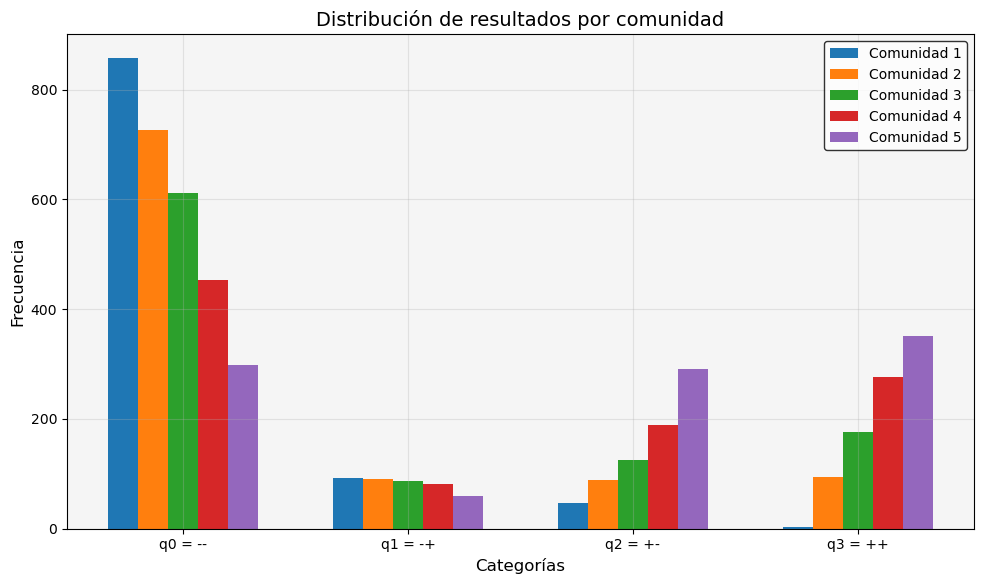

In [9]:
np.random.seed(22)
# personas por comunidad
N = 1000

# ground truth
prevalencia = np.array([0, 0.15, 0.3, 0.45, 0.7])
sensibilidad = np.array([0.9, 0.6])
especificidad = np.array([0.95, 0.9])

# Simular datos para el modelo Hui-Walter
resultados = []
for p_c in prevalencia:
    q0 = (
        p_c * (1 - sensibilidad[0]) * (1 - sensibilidad[1])
        + (1 - p_c) * especificidad[0] * especificidad[1]
    )
    q1 = p_c * (1 - sensibilidad[0]) * sensibilidad[1] + (1 - p_c) * especificidad[
        0
    ] * (1 - especificidad[1])
    q2 = (
        p_c * sensibilidad[0] * (1 - sensibilidad[1])
        + (1 - p_c) * (1 - especificidad[0]) * especificidad[1]
    )
    q3 = p_c * sensibilidad[0] * sensibilidad[1] + (1 - p_c) * (
        1 - especificidad[0]
    ) * (1 - especificidad[1])

    # Distribución multinomial para los resultados
    resultados.append(np.random.multinomial(N, [q0, q1, q2, q3]))

categorias = ["q0 = --", "q1 = -+", "q2 = +-", "q3 = ++"]
x = np.arange(len(categorias)) * 1.5

figura, eje = plt.subplots(figsize=(10, 6))

for indice, resultado_comunidad in enumerate(resultados):
    eje.bar(
        x + indice * 0.2, resultado_comunidad, width=0.2, label=f"Comunidad {indice+1}"
    )

eje.set_xticks(x + 0.4)
eje.set_xticklabels(categorias)
eje.set_xlabel("Categorías")
eje.set_ylabel("Frecuencia")
eje.set_title("Distribución de resultados por comunidad")
eje.legend()

plt.tight_layout()
plt.show()

### 2.1.2 Inferencia mediante PPL

En esta sección implementaremos el modelo Hui-Walter utilizando PyMC para realizar la inferencia bayesiana. El modelo nos permitirá estimar la prevalencia, sensibilidad y especificidad de los tests.

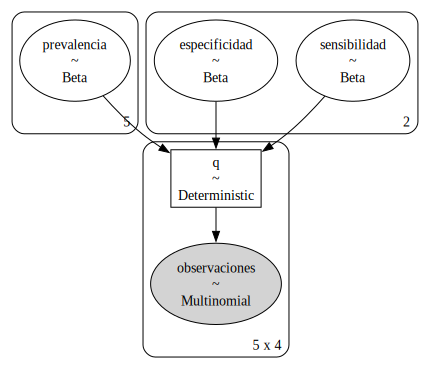

In [10]:
import pymc as pm
import arviz as az

with pm.Model() as hui_walter_model:
    # Priors para prevalencia, sensibilidad y especificidad
    prevalencia = pm.Beta(
        "prevalencia", alpha=1, beta=1, shape=5, initval=[0.5] * 5
    )  # Una para cada comunidad
    sensibilidad = pm.Beta(
        "sensibilidad", alpha=1, beta=1, shape=2, initval=[0.8] * 2
    )  # Una para cada test
    especificidad = pm.Beta(
        "especificidad", alpha=1, beta=1, shape=2, initval=[0.8] * 2
    )  # Una para cada test

    # Probabilidades de las categorías en funcion de la prevalencia, sensibilidad y especificidad
    q0 = (
        prevalencia * (1 - sensibilidad[0]) * (1 - sensibilidad[1])
        + (1 - prevalencia) * especificidad[0] * especificidad[1]
    )
    q1 = prevalencia * (1 - sensibilidad[0]) * sensibilidad[1] + (
        1 - prevalencia
    ) * especificidad[0] * (1 - especificidad[1])
    q2 = (
        prevalencia * sensibilidad[0] * (1 - sensibilidad[1])
        + (1 - prevalencia) * (1 - especificidad[0]) * especificidad[1]
    )
    q3 = prevalencia * sensibilidad[0] * sensibilidad[1] + (1 - prevalencia) * (
        1 - especificidad[0]
    ) * (1 - especificidad[1])

    q = pm.Deterministic("q", pm.math.stack([q0, q1, q2, q3], axis=1))

    # Observaciones
    observaciones = pm.Multinomial(
        "observaciones", n=N, p=q, observed=np.array(resultados)
    )

# Visualización del modelo
pm.model_to_graphviz(hui_walter_model)

### 2.1.3 Diagnóstico del motor de inferencia

En esta sección analizaremos la calidad de la inferencia realizada por el motor MCMC. Verificaremos la convergencia de las cadenas y la calidad de las estimaciones.

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [prevalencia, sensibilidad, especificidad]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


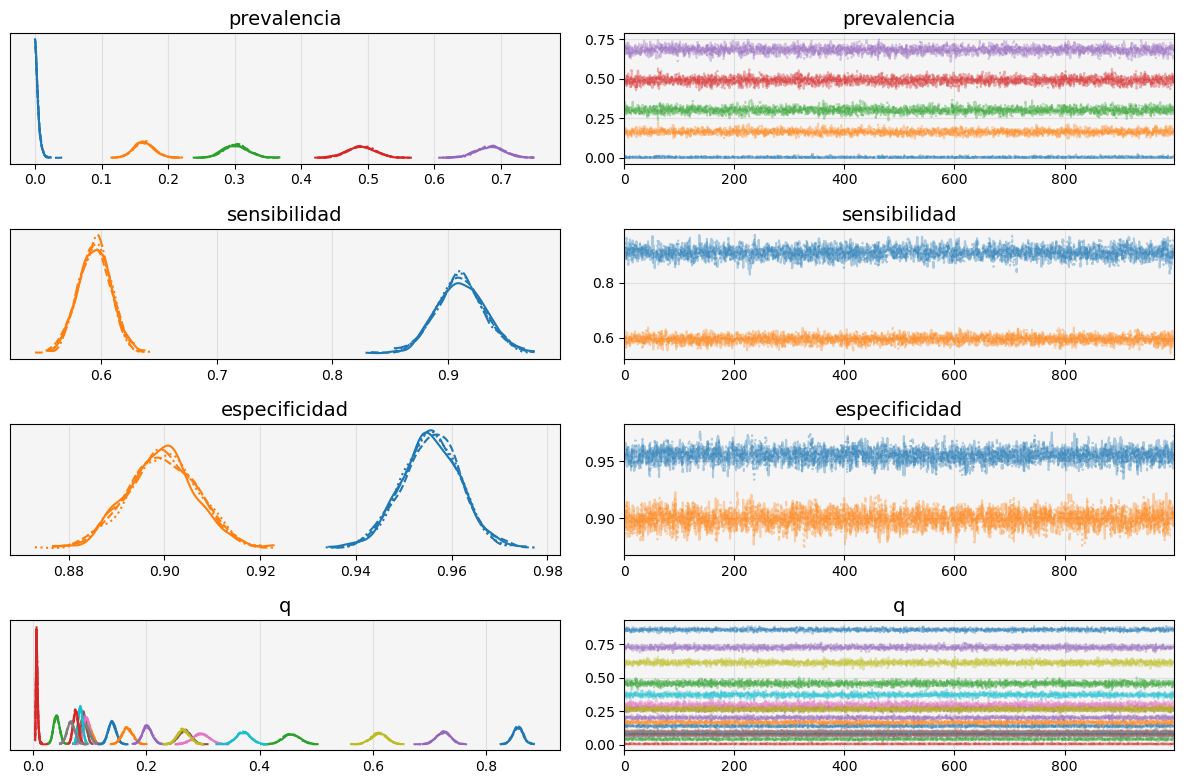

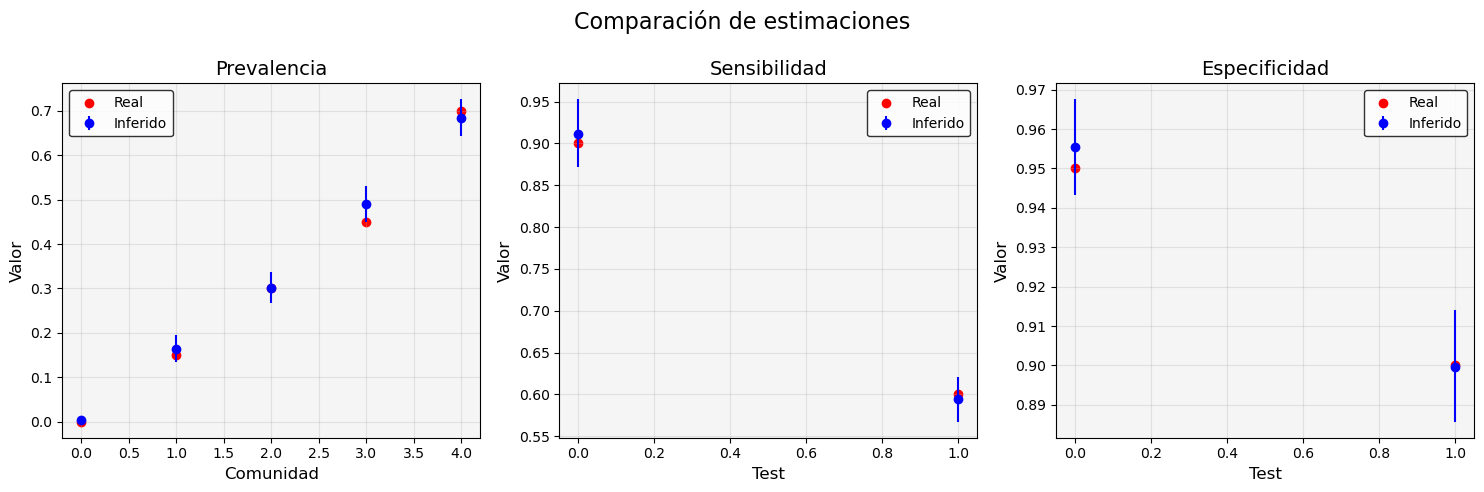

In [11]:
with hui_walter_model:
    trace = pm.sample(
        1000,
        return_inferencedata=True,
        target_accept=0.95,
    )

# Visualización de las trazas
az.plot_trace(trace, combined=False)
plt.tight_layout()
plt.show()

# Resumen de las estimaciones
az.summary(trace, hdi_prob=0.95)

# Extracción de las estimaciones
prevalencia_inferida = trace.posterior["prevalencia"].mean(dim=["chain", "draw"])
sensibilidad_inferida = trace.posterior["sensibilidad"].mean(dim=["chain", "draw"])
especificidad_inferida = trace.posterior["especificidad"].mean(dim=["chain", "draw"])

# Cálculo de intervalos HDI
hdi_prevalencia = az.hdi(trace, var_names="prevalencia", hdi_prob=0.95)["prevalencia"]
hdi_sensibilidad = az.hdi(trace, var_names="sensibilidad", hdi_prob=0.95)["sensibilidad"]
hdi_especificidad = az.hdi(trace, var_names="especificidad", hdi_prob=0.95)["especificidad"]

# Valores reales para comparación
valores_reales_prevalencia = np.array([0, 0.15, 0.3, 0.45, 0.7])
valores_reales_sensibilidad = np.array([0.9, 0.6])
valores_reales_especificidad = np.array([0.95, 0.9])

# Visualización de las estimaciones
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Comparación de estimaciones", fontsize=16)

# Prevalencia
axs[0].errorbar(
    range(len(prevalencia_inferida)),
    prevalencia_inferida,
    yerr=[
        prevalencia_inferida - hdi_prevalencia[:, 0],
        hdi_prevalencia[:, 1] - prevalencia_inferida,
    ],
    fmt="o",
    label="Inferido",
    color="blue",
)
axs[0].scatter(
    range(len(valores_reales_prevalencia)),
    valores_reales_prevalencia,
    color="red",
    label="Real",
)
axs[0].set_title("Prevalencia")
axs[0].set_xlabel("Comunidad")
axs[0].set_ylabel("Valor")
axs[0].legend()

# Sensibilidad
axs[1].errorbar(
    range(len(sensibilidad_inferida)),
    sensibilidad_inferida,
    yerr=[
        sensibilidad_inferida - hdi_sensibilidad[:, 0],
        hdi_sensibilidad[:, 1] - sensibilidad_inferida,
    ],
    fmt="o",
    label="Inferido",
    color="blue",
)
axs[1].scatter(
    range(len(valores_reales_sensibilidad)),
    valores_reales_sensibilidad,
    color="red",
    label="Real",
)
axs[1].set_title("Sensibilidad")
axs[1].set_xlabel("Test")
axs[1].set_ylabel("Valor")
axs[1].legend()

# Especificidad
axs[2].errorbar(
    range(len(especificidad_inferida)),
    especificidad_inferida,
    yerr=[
        especificidad_inferida - hdi_especificidad[:, 0],
        hdi_especificidad[:, 1] - especificidad_inferida,
    ],
    fmt="o",
    label="Inferido",
    color="blue",
)
axs[2].scatter(
    range(len(valores_reales_especificidad)),
    valores_reales_especificidad,
    color="red",
    label="Real",
)
axs[2].set_title("Especificidad")
axs[2].set_xlabel("Test")
axs[2].set_ylabel("Valor")
axs[2].legend()

plt.tight_layout()
plt.show()

### 2.1.4 Análisis con datos con covarianza

En esta sección analizaremos cómo se comporta el modelo cuando los tests presentan covarianza entre sí. Esto nos permitirá entender las limitaciones del modelo Hui-Walter cuando no se cumple la suposición de independencia.

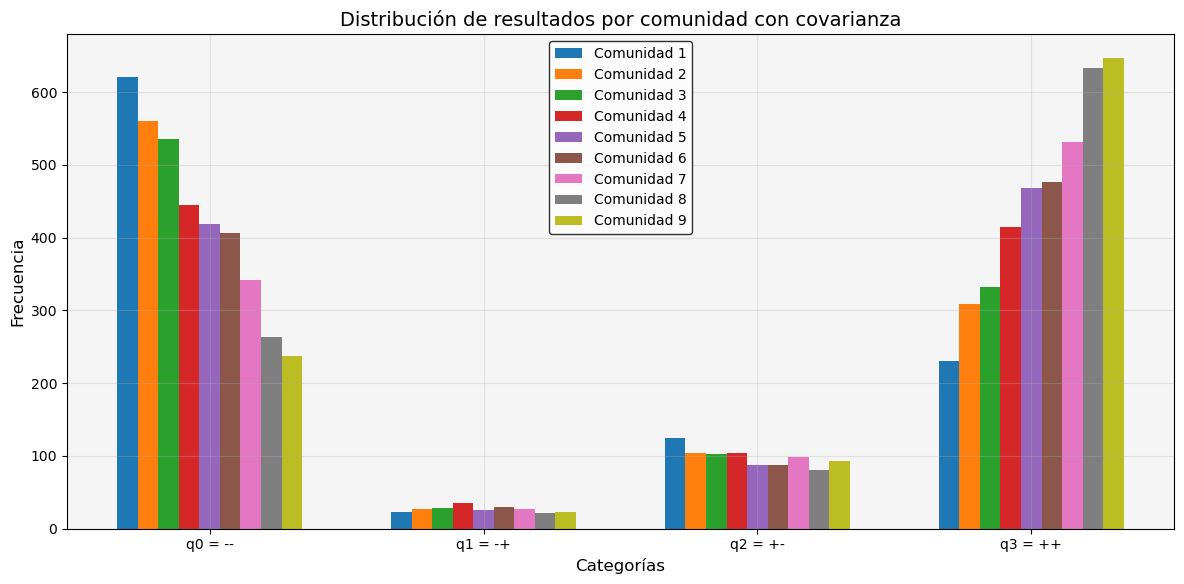

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [prevalencia, sensibilidad, especificidad, cov_sensibilidad, cov_especificidad]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.
There were 150 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


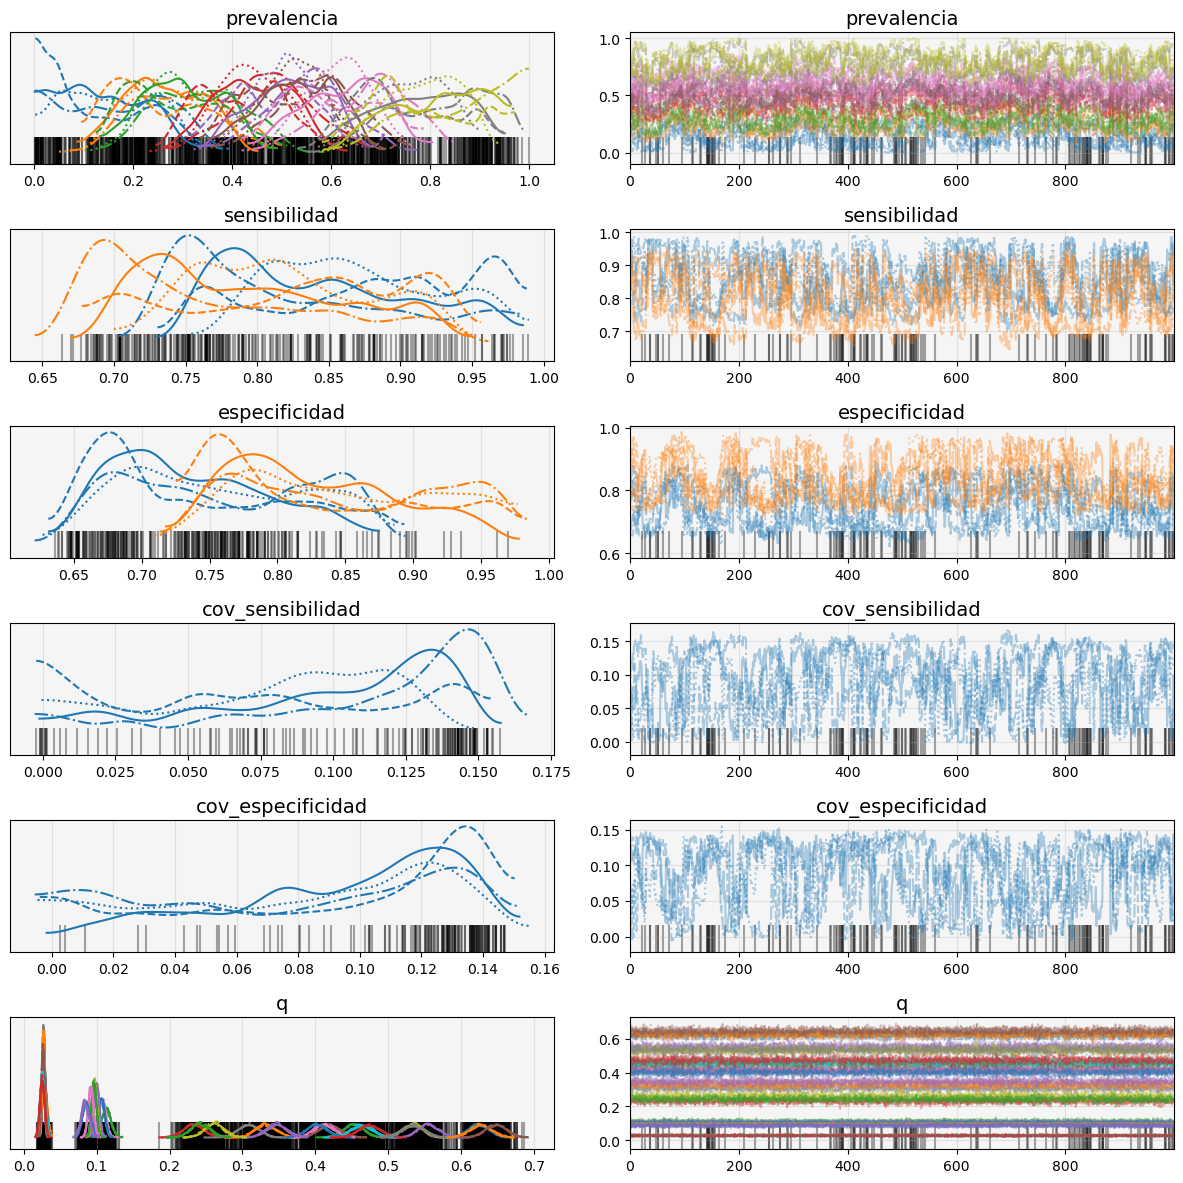

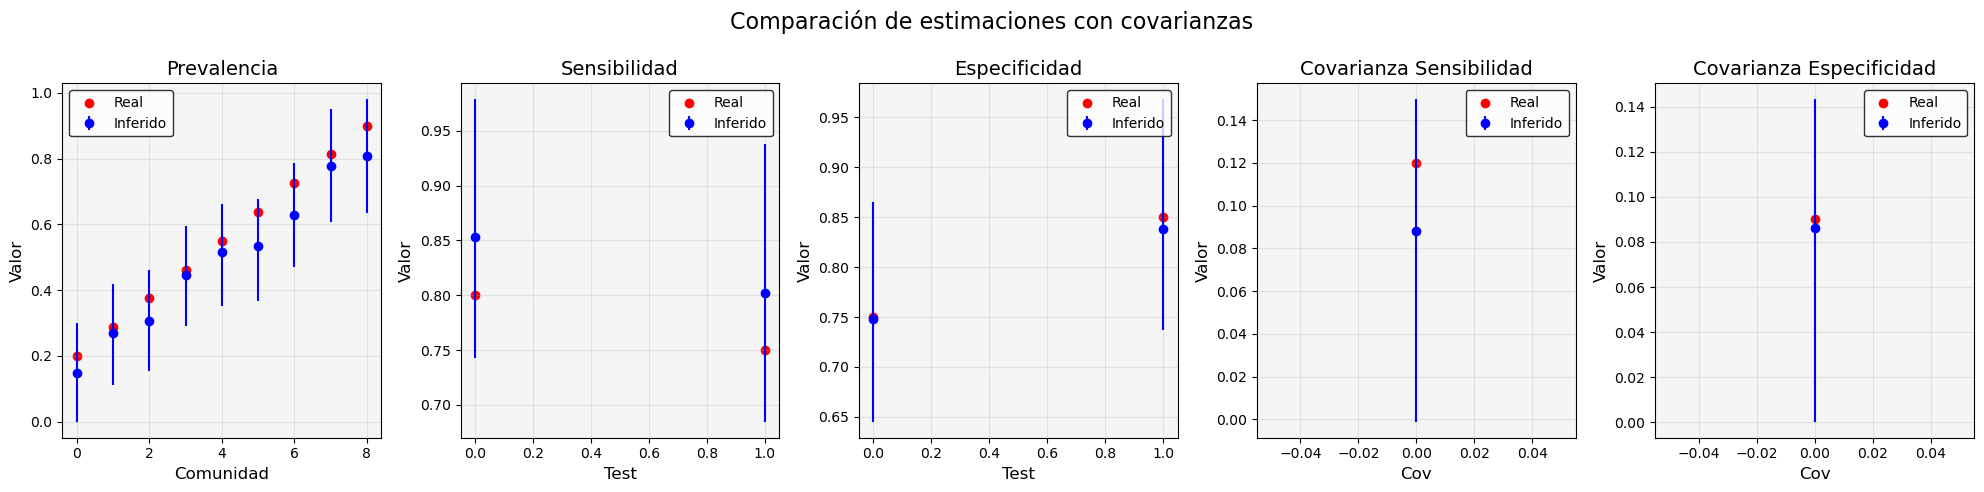

In [12]:
# Simular datos para el modelo Hui-Walter con covarianza
np.random.seed(22)

cov_0 = 0.09  # cov de la especificidad
cov_1 = 0.12  # cov de la sensibilidad

prevalencia = np.linspace(0.2, 0.9, 9)  # prevalencia entre 0 y 1
sensibilidad = np.array([0.8, 0.75])
especificidad = np.array([0.75, 0.85])

resultados_covarianza = []
for p_c in prevalencia:
    q0 = p_c * ((1 - sensibilidad[0]) * (1 - sensibilidad[1]) + cov_1) + (1 - p_c) * (
        especificidad[0] * especificidad[1] + cov_0
    )
    q1 = p_c * ((1 - sensibilidad[0]) * sensibilidad[1] - cov_1) + (1 - p_c) * (
        especificidad[0] * (1 - especificidad[1]) - cov_0
    )
    q2 = p_c * (sensibilidad[0] * (1 - sensibilidad[1]) - cov_1) + (1 - p_c) * (
        (1 - especificidad[0]) * especificidad[1] - cov_0
    )
    q3 = p_c * ((sensibilidad[0] * sensibilidad[1]) + cov_1) + (1 - p_c) * (
        (1 - especificidad[0]) * (1 - especificidad[1]) + cov_0
    )

    # Distribución multinomial para los resultados
    resultados_covarianza.append(np.random.multinomial(N, [q0, q1, q2, q3]))

# Visualización de los resultados
categorias = ["q0 = --", "q1 = -+", "q2 = +-", "q3 = ++"]
x = np.arange(len(categorias)) * 2

figura, eje = plt.subplots(figsize=(12, 6))

for indice, resultados_comunidad in enumerate(resultados_covarianza):
    eje.bar(
        x + indice * 0.15,
        resultados_comunidad,
        width=0.15,
        label=f"Comunidad {indice+1}",
    )

eje.set_xticks(x + 0.6)
eje.set_xticklabels(categorias)
eje.set_xlabel("Categorías")
eje.set_ylabel("Frecuencia")
eje.set_title("Distribución de resultados por comunidad con covarianza")
eje.legend()

plt.tight_layout()
plt.show()

# Implementación del modelo con covarianza
with pm.Model() as hui_walter_model_2:
    # Priors para prevalencia, sensibilidad y especificidad
    prevalencia = pm.Beta(
        "prevalencia", alpha=1, beta=1, shape=9,
    )  # Una para cada comunidad
    sensibilidad = pm.Beta(
        "sensibilidad", alpha=1, beta=1, shape=2, initval=[0.8] * 2
    )  # Una para cada test
    especificidad = pm.Beta(
        "especificidad", alpha=1, beta=1, shape=2, initval=[0.8] * 2
    )  # Una para cada test

    # Priors para covarianzas
    cov_sensibilidad = pm.Uniform(
        "cov_sensibilidad",
        lower=pm.math.maximum(0, sensibilidad[0] + sensibilidad[1] - 1)
        - sensibilidad[0] * sensibilidad[1],
        upper=pm.math.minimum(sensibilidad[0], sensibilidad[1])
        - sensibilidad[0] * sensibilidad[1],
    )
    cov_especificidad = pm.Uniform(
        "cov_especificidad",
        lower=pm.math.maximum(0, especificidad[0] + especificidad[1] - 1)
        - especificidad[0] * especificidad[1],
        upper=pm.math.minimum(especificidad[0], especificidad[1])
        - especificidad[0] * especificidad[1],
    )

    # Probabilidades en función de la prevalencia, sensibilidad, especificidad y covarianzas
    q0 = prevalencia * (
        (1 - sensibilidad[0]) * (1 - sensibilidad[1]) + cov_sensibilidad
    ) + (1 - prevalencia) * (especificidad[0] * especificidad[1] + cov_especificidad)
    q1 = prevalencia * ((1 - sensibilidad[0]) * sensibilidad[1] - cov_sensibilidad) + (
        1 - prevalencia
    ) * (especificidad[0] * (1 - especificidad[1]) - cov_especificidad)
    q2 = prevalencia * (sensibilidad[0] * (1 - sensibilidad[1]) - cov_sensibilidad) + (
        1 - prevalencia
    ) * ((1 - especificidad[0]) * especificidad[1] - cov_especificidad)
    q3 = prevalencia * (sensibilidad[0] * sensibilidad[1] + cov_sensibilidad) + (
        1 - prevalencia
    ) * ((1 - especificidad[0]) * (1 - especificidad[1]) + cov_especificidad)

    q = pm.Deterministic("q", pm.math.stack([q0, q1, q2, q3], axis=1))

    # Observaciones
    observaciones = pm.Multinomial(
        "observaciones", n=N, p=q, observed=np.array(resultados_covarianza)
    )

# Visualización del modelo
pm.model_to_graphviz(hui_walter_model_2)

# Inferencia
with hui_walter_model_2:
    trace_cov = pm.sample(
        1000,
        return_inferencedata=True,
    )

# Diagnóstico
az.plot_trace(trace_cov, combined=False)
plt.tight_layout()
plt.show()

# Resumen de las estimaciones
az.summary(trace_cov, hdi_prob=0.95)

# Extracción de las estimaciones para el modelo con covarianza
prevalencia_inferida = trace_cov.posterior["prevalencia"].mean(dim=["chain", "draw"])
sensibilidad_inferida = trace_cov.posterior["sensibilidad"].mean(dim=["chain", "draw"])
especificidad_inferida = trace_cov.posterior["especificidad"].mean(dim=["chain", "draw"])
covarianza_sensibilidad_inferida = trace_cov.posterior["cov_sensibilidad"].mean(dim=["chain", "draw"])
covarianza_especificidad_inferida = trace_cov.posterior["cov_especificidad"].mean(dim=["chain", "draw"])

# Cálculo de intervalos HDI para el modelo con covarianza
hdi_prevalencia = az.hdi(trace_cov, var_names="prevalencia", hdi_prob=0.95)["prevalencia"]
hdi_sensibilidad = az.hdi(trace_cov, var_names="sensibilidad", hdi_prob=0.95)["sensibilidad"]
hdi_especificidad = az.hdi(trace_cov, var_names="especificidad", hdi_prob=0.95)["especificidad"]
hdi_cov_sensibilidad = az.hdi(trace_cov, var_names="cov_sensibilidad", hdi_prob=0.95)["cov_sensibilidad"]
hdi_cov_especificidad = az.hdi(trace_cov, var_names="cov_especificidad", hdi_prob=0.95)["cov_especificidad"]

# Valores reales para comparación
valores_reales_prevalencia = np.linspace(0.2, 0.9, 9)
valores_reales_sensibilidad = np.array([0.8, 0.75])
valores_reales_especificidad = np.array([0.75, 0.85])
cov_sensibilidad_real = 0.12
cov_especificidad_real = 0.09

# Visualización de las estimaciones
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle("Comparación de estimaciones con covarianzas", fontsize=16)

# Prevalencia
axs[0].errorbar(
    range(len(prevalencia_inferida)),
    prevalencia_inferida,
    yerr=[
        prevalencia_inferida - hdi_prevalencia[:, 0],
        hdi_prevalencia[:, 1] - prevalencia_inferida,
    ],
    fmt="o",
    label="Inferido",
    color="blue",
)
axs[0].scatter(
    range(len(valores_reales_prevalencia)),
    valores_reales_prevalencia,
    color="red",
    label="Real",
)
axs[0].set_title("Prevalencia")
axs[0].set_xlabel("Comunidad")
axs[0].set_ylabel("Valor")
axs[0].legend()

# Sensibilidad
axs[1].errorbar(
    range(len(sensibilidad_inferida)),
    sensibilidad_inferida,
    yerr=[
        sensibilidad_inferida - hdi_sensibilidad[:, 0],
        hdi_sensibilidad[:, 1] - sensibilidad_inferida,
    ],
    fmt="o",
    label="Inferido",
    color="blue",
)
axs[1].scatter(
    range(len(valores_reales_sensibilidad)),
    valores_reales_sensibilidad,
    color="red",
    label="Real",
)
axs[1].set_title("Sensibilidad")
axs[1].set_xlabel("Test")
axs[1].set_ylabel("Valor")
axs[1].legend()

# Especificidad
axs[2].errorbar(
    range(len(especificidad_inferida)),
    especificidad_inferida,
    yerr=[
        especificidad_inferida - hdi_especificidad[:, 0],
        hdi_especificidad[:, 1] - especificidad_inferida,
    ],
    fmt="o",
    label="Inferido",
    color="blue",
)
axs[2].scatter(
    range(len(valores_reales_especificidad)),
    valores_reales_especificidad,
    color="red",
    label="Real",
)
axs[2].set_title("Especificidad")
axs[2].set_xlabel("Test")
axs[2].set_ylabel("Valor")
axs[2].legend()

# Covarianza Sensibilidad
axs[3].errorbar(
    [0],
    [covarianza_sensibilidad_inferida],
    yerr=np.array([
        [covarianza_sensibilidad_inferida - hdi_cov_sensibilidad[0]],
        [hdi_cov_sensibilidad[1] - covarianza_sensibilidad_inferida],
    ]),
    fmt="o",
    label="Inferido",
    color="blue",
)
axs[3].scatter(
    [0],
    [cov_sensibilidad_real],
    color="red",
    label="Real",
)
axs[3].set_title("Covarianza Sensibilidad")
axs[3].set_xlabel("Cov")
axs[3].set_ylabel("Valor")
axs[3].legend()

# Covarianza Especificidad
axs[4].errorbar(
    [0],
    [covarianza_especificidad_inferida],
    yerr=np.array([
        [covarianza_especificidad_inferida - hdi_cov_especificidad[0]],
        [hdi_cov_especificidad[1] - covarianza_especificidad_inferida],
    ]),
    fmt="o",
    label="Inferido",
    color="blue",
)
axs[4].scatter(
    [0],
    [cov_especificidad_real],
    color="red",
    label="Real",
)
axs[4].set_title("Covarianza Especificidad")
axs[4].set_xlabel("Cov")
axs[4].set_ylabel("Valor")
axs[4].legend()

plt.tight_layout()
plt.show()

### 2.1.5 Conclusiones

En el caso de los tests que generan diagnósticos de manera independiente, el modelo Hui-Walter permite inferir parámetros como la sensibilidad, especificidad y prevalencia sin necesidad de conocer el estado real de las personas (infectadas/no infectadas). Para esto se debe cumplir la suposición de independencia entre los tests y contar con una cantidad de datos suficiente para que la inferencia sea robusta.

De manera análoga se podría crear un detector de mentiras y verdades entre medios de comunicación que mientan de manera aleatoria de manera independiente.

En ambos casos la suposición de independencia es clave, como se pudo ver en el ejemplo donde se introdujo covarianza entre los tests y no se pudieron inferir correctamente los parámetros.

### 2.2 Modelo Dendukuiri

En esta sección implementaremos el modelo Dendukuiri, una extensión del modelo Hui-Walter que permite evaluar procedimientos de medición que presentan covarianza entre sí. Este modelo es particularmente útil cuando los tests no son independientes, lo cual es común en la práctica clínica.

El modelo Dendukuiri introduce dos parámetros adicionales:
- Covarianza de sensibilidad: mide la dependencia entre los tests para detectar casos positivos
- Covarianza de especificidad: mide la dependencia entre los tests para detectar casos negativos

Estas covarianzas permiten modelar situaciones donde los tests tienden a coincidir en sus resultados más allá de lo que se esperaría por azar.

In [13]:
with pm.Model() as dedukuri_model:
    # Priors para prevalencia, sensibilidad y especificidad
    prevalencia = pm.Beta(
        "prevalencia", alpha=1, beta=1, shape=9
    )  # Una para cada comunidad
    sensibilidad = pm.Beta(
        "sensibilidad", alpha=1, beta=1, shape=2, initval=[0.8] * 2
    )  # Una para cada test
    especificidad = pm.Beta(
        "especificidad", alpha=1, beta=1, shape=2, initval=[0.8] * 2
    )  # Una para cada test

    # distribución de las covarianzas
    cov_sensibilidad = pm.Uniform(
        "cov_sensibilidad",
        lower=pm.math.maximum(0, sensibilidad[0] + sensibilidad[1] - 1)
        - sensibilidad[0] * sensibilidad[1],
        upper=pm.math.minimum(sensibilidad[0], sensibilidad[1])
        - sensibilidad[0] * sensibilidad[1],
    )
    cov_especificidad = pm.Uniform(
        "cov_especificidad",
        lower=pm.math.maximum(0, especificidad[0] + especificidad[1] - 1)
        - especificidad[0] * especificidad[1],
        upper=pm.math.minimum(especificidad[0], especificidad[1])
        - especificidad[0] * especificidad[1],
    )

    # Probabilidades en función de la prevalencia, sensibilidad, especificidad y covarianzas
    q0 = prevalencia * (
        (1 - sensibilidad[0]) * (1 - sensibilidad[1]) + cov_sensibilidad
    ) + (1 - prevalencia) * (especificidad[0] * especificidad[1] + cov_especificidad)
    q1 = prevalencia * ((1 - sensibilidad[0]) * sensibilidad[1] - cov_sensibilidad) + (
        1 - prevalencia
    ) * (especificidad[0] * (1 - especificidad[1]) - cov_especificidad)
    q2 = prevalencia * (sensibilidad[0] * (1 - sensibilidad[1]) - cov_sensibilidad) + (
        1 - prevalencia
    ) * ((1 - especificidad[0]) * especificidad[1] - cov_especificidad)
    q3 = prevalencia * (sensibilidad[0] * sensibilidad[1] + cov_sensibilidad) + (
        1 - prevalencia
    ) * ((1 - especificidad[0]) * (1 - especificidad[1]) + cov_especificidad)

    q = pm.Deterministic("q", pm.math.stack([q0, q1, q2, q3], axis=1))

    # Observaciones
    observaciones = pm.Multinomial(
        "observaciones", n=N, p=q, observed=np.array(resultados_covarianza)
    )

### 2.2.1 Inferencia y Diagnóstico

Realizamos la inferencia utilizando el método MCMC con PyMC. El modelo incluye:
- Priors Beta para prevalencia, sensibilidad y especificidad
- Priors Uniformes para las covarianzas, con límites que aseguran la validez de las probabilidades
- Likelihood multinomial para los resultados observados

El diagnóstico de las cadenas MCMC nos permite verificar la convergencia y la calidad de la inferencia.

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [prevalencia, sensibilidad, especificidad, cov_sensibilidad, cov_especificidad]


Output()

Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 30 seconds.


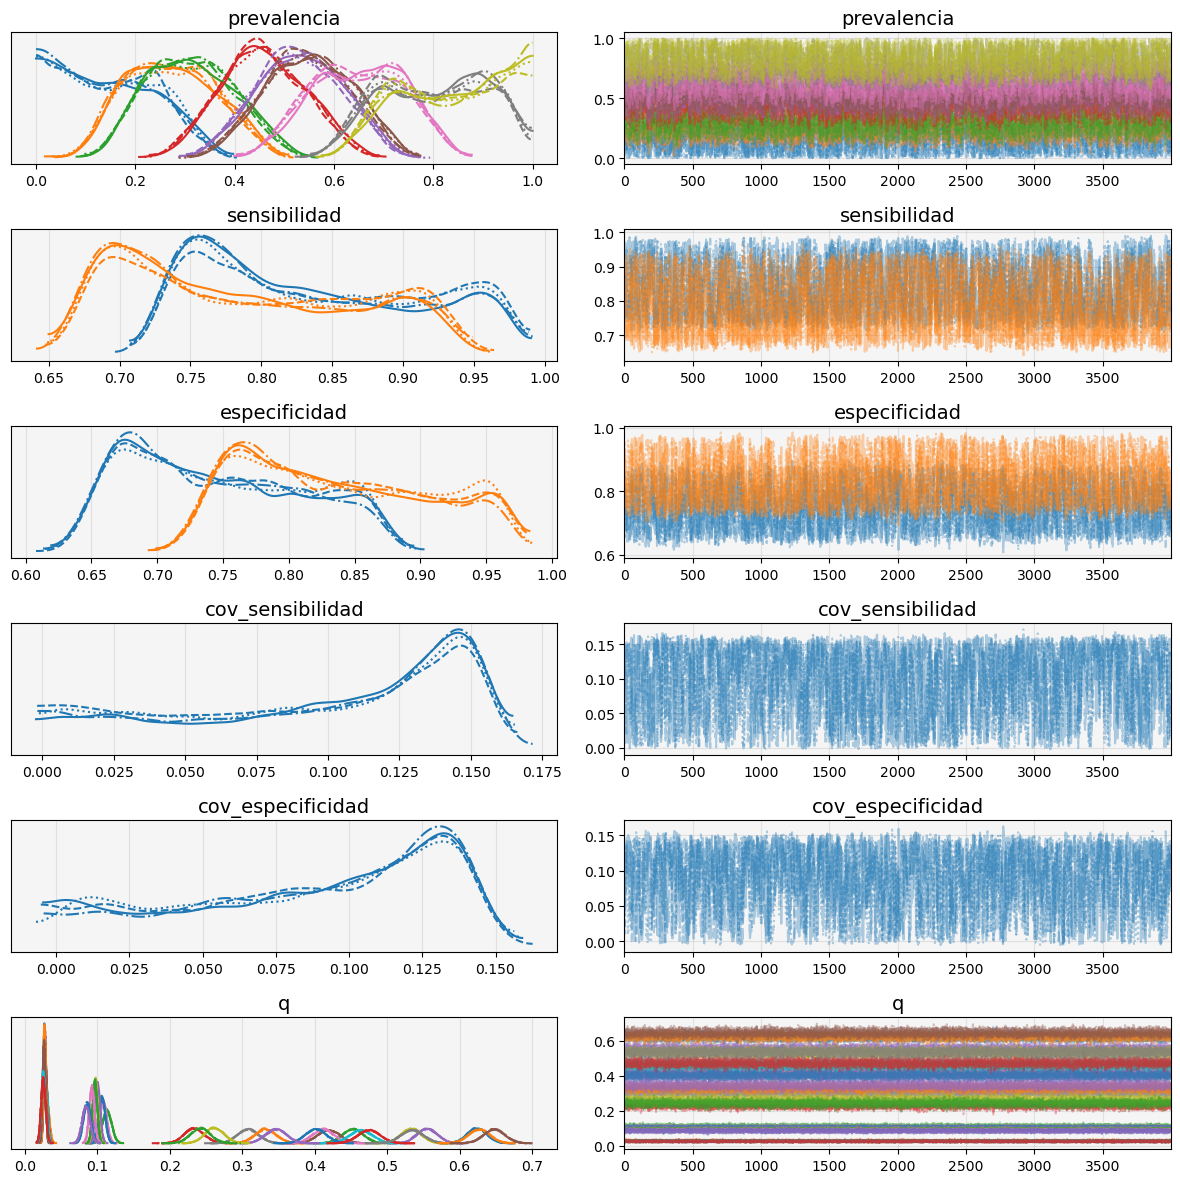

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
prevalencia[0],0.149,0.096,0.000,0.308,0.003,0.001,1116.0,1843.0,1.00
prevalencia[1],0.272,0.090,0.114,0.442,0.003,0.001,1132.0,1918.0,1.00
prevalencia[2],0.312,0.087,0.157,0.479,0.003,0.001,1153.0,1826.0,1.00
prevalencia[3],0.457,0.085,0.296,0.619,0.003,0.001,1115.0,2041.0,1.00
prevalencia[4],0.530,0.086,0.364,0.690,0.003,0.001,1082.0,2358.0,1.00
prevalencia[5],0.549,0.087,0.385,0.710,0.003,0.001,1071.0,2327.0,1.00
prevalencia[6],0.647,0.093,0.478,0.817,0.003,0.001,1057.0,2413.0,1.00
prevalencia[7],0.800,0.107,0.623,0.982,0.003,0.001,969.0,2297.0,1.00
prevalencia[8],0.834,0.108,0.662,1.000,0.003,0.001,953.0,2404.0,1.01
sensibilidad[0],0.836,0.078,0.730,0.974,0.003,0.001,931.0,2510.0,1.01


In [14]:
# Inferencia
with dedukuri_model:
    trace_dedukuri = pm.sample(
        4000,
        target_accept=0.95,
    )

# Diagnóstico
az.plot_trace(trace_dedukuri, combined=False)
plt.tight_layout()
plt.show()

# Resumen de las estimaciones
az.summary(trace_dedukuri, hdi_prob=0.95)

### 2.2.2 Análisis de Resultados

Analizamos los resultados de la inferencia comparando las estimaciones con los valores reales. Para cada parámetro:
- Calculamos la media posterior y los intervalos HDI del 95%
- Comparamos con los valores reales utilizados para generar los datos
- Evaluamos la precisión de las estimaciones y la cobertura de los intervalos

Esta comparación nos permite validar el modelo y entender su capacidad para recuperar los parámetros reales.

In [15]:
# Extracción de las estimaciones
prevalencia_inferida = trace_dedukuri.posterior["prevalencia"].mean(
    dim=["chain", "draw"]
)
sensibilidad_inferida = trace_dedukuri.posterior["sensibilidad"].mean(
    dim=["chain", "draw"]
)
especificidad_inferida = trace_dedukuri.posterior["especificidad"].mean(
    dim=["chain", "draw"]
)
covarianza_sensibilidad_inferida = trace_dedukuri.posterior["cov_sensibilidad"].mean(
    dim=["chain", "draw"]
)
covarianza_especificidad_inferida = trace_dedukuri.posterior["cov_especificidad"].mean(
    dim=["chain", "draw"]
)

# Cálculo de intervalos HDI
hdi_prevalencia = az.hdi(trace_dedukuri, var_names="prevalencia", hdi_prob=0.95)["prevalencia"]
hdi_sensibilidad = az.hdi(trace_dedukuri, var_names="sensibilidad", hdi_prob=0.95)["sensibilidad"]
hdi_especificidad = az.hdi(trace_dedukuri, var_names="especificidad", hdi_prob=0.95)["especificidad"]
hdi_cov_sensibilidad = az.hdi(
    trace_dedukuri, var_names="cov_sensibilidad", hdi_prob=0.95
)["cov_sensibilidad"]
hdi_cov_especificidad = az.hdi(
    trace_dedukuri, var_names="cov_especificidad", hdi_prob=0.95
)["cov_especificidad"]

# Valores reales para comparación
valores_reales_prevalencia = np.array([0, 0.15, 0.3, 0.45, 0.7])
valores_reales_sensibilidad = np.array([0.8, 0.75])
valores_reales_especificidad = np.array([0.75, 0.85])
cov_sensibilidad_real = 0.12
cov_especificidad_real = 0.09

### 2.2.3 Visualización y Comparación

Visualizamos las estimaciones junto con sus intervalos de credibilidad y los valores reales. Esta comparación nos permite:
- Evaluar la precisión de las estimaciones para cada parámetro
- Verificar si los intervalos HDI contienen los valores reales
- Identificar posibles sesgos o problemas en la inferencia

La visualización incluye:
- Prevalencia por comunidad
- Sensibilidad y especificidad de cada test
- Covarianzas de sensibilidad y especificidad

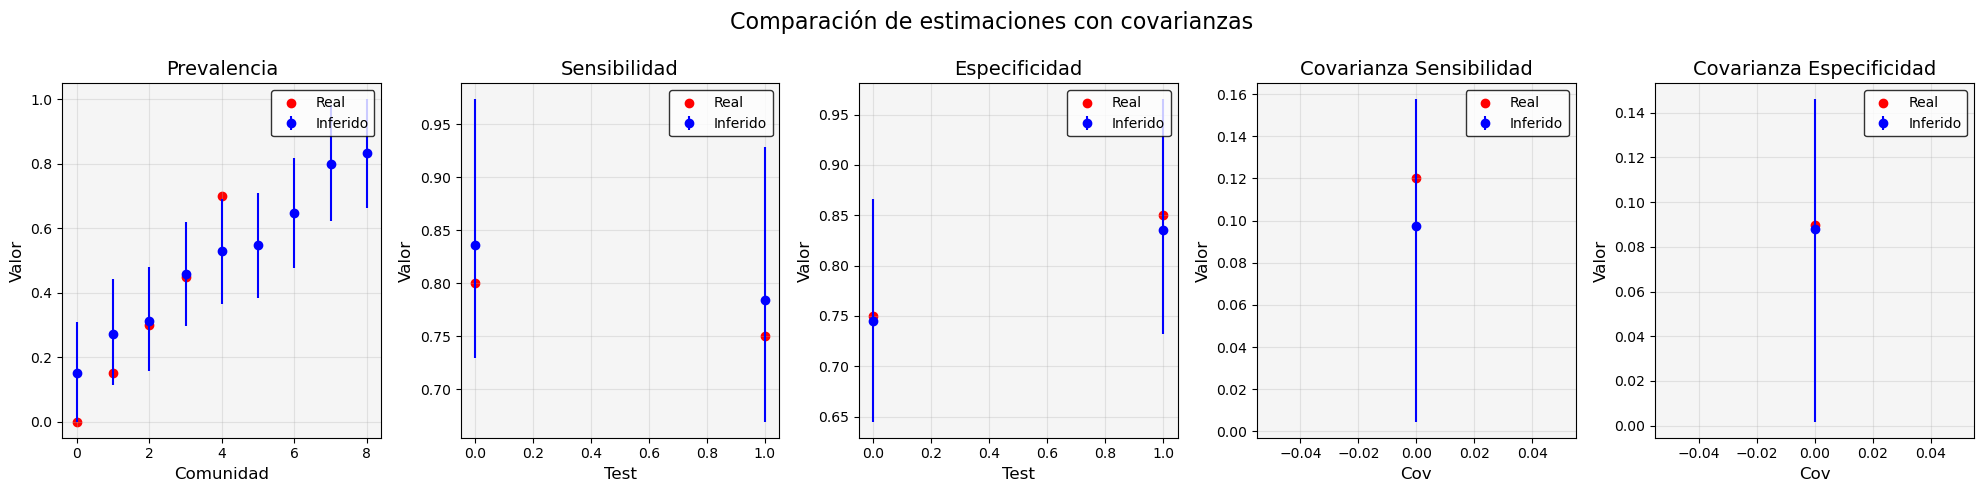

In [16]:
# Visualización de las estimaciones
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle("Comparación de estimaciones con covarianzas", fontsize=16)

# Prevalencia
axs[0].errorbar(
    range(len(prevalencia_inferida)),
    prevalencia_inferida,
    yerr=[
        prevalencia_inferida - hdi_prevalencia[:, 0],
        hdi_prevalencia[:, 1] - prevalencia_inferida,
    ],
    fmt="o",
    label="Inferido",
    color="blue",
)
axs[0].scatter(
    range(len(valores_reales_prevalencia)),
    valores_reales_prevalencia,
    color="red",
    label="Real",
)
axs[0].set_title("Prevalencia")
axs[0].set_xlabel("Comunidad")
axs[0].set_ylabel("Valor")
axs[0].legend()

# Sensibilidad
axs[1].errorbar(
    range(len(sensibilidad_inferida)),
    sensibilidad_inferida,
    yerr=[
        sensibilidad_inferida - hdi_sensibilidad[:, 0],
        hdi_sensibilidad[:, 1] - sensibilidad_inferida,
    ],
    fmt="o",
    label="Inferido",
    color="blue",
)
axs[1].scatter(
    range(len(valores_reales_sensibilidad)),
    valores_reales_sensibilidad,
    color="red",
    label="Real",
)
axs[1].set_title("Sensibilidad")
axs[1].set_xlabel("Test")
axs[1].set_ylabel("Valor")
axs[1].legend()

# Especificidad
axs[2].errorbar(
    range(len(especificidad_inferida)),
    especificidad_inferida,
    yerr=[
        especificidad_inferida - hdi_especificidad[:, 0],
        hdi_especificidad[:, 1] - especificidad_inferida,
    ],
    fmt="o",
    label="Inferido",
    color="blue",
)
axs[2].scatter(
    range(len(valores_reales_especificidad)),
    valores_reales_especificidad,
    color="red",
    label="Real",
)
axs[2].set_title("Especificidad")
axs[2].set_xlabel("Test")
axs[2].set_ylabel("Valor")
axs[2].legend()

# Covarianza Sensibilidad
axs[3].errorbar(
    [0],
    [covarianza_sensibilidad_inferida],
    yerr=np.array([
        [covarianza_sensibilidad_inferida - hdi_cov_sensibilidad[0]],
        [hdi_cov_sensibilidad[1] - covarianza_sensibilidad_inferida],
    ]),
    fmt="o",
    label="Inferido",
    color="blue",
)
axs[3].scatter(
    [0],
    [cov_sensibilidad_real],
    color="red",
    label="Real",
)
axs[3].set_title("Covarianza Sensibilidad")
axs[3].set_xlabel("Cov")
axs[3].set_ylabel("Valor")
axs[3].legend()

# Covarianza Especificidad
axs[4].errorbar(
    [0],
    [covarianza_especificidad_inferida],
    yerr=np.array([
        [covarianza_especificidad_inferida - hdi_cov_especificidad[0]],
        [hdi_cov_especificidad[1] - covarianza_especificidad_inferida],
    ]),
    fmt="o",
    label="Inferido",
    color="blue",
)
axs[4].scatter(
    [0],
    [cov_especificidad_real],
    color="red",
    label="Real",
)
axs[4].set_title("Covarianza Especificidad")
axs[4].set_xlabel("Cov")
axs[4].set_ylabel("Valor")
axs[4].legend()

plt.tight_layout()
plt.show()

### 2.2.4 Conclusiones

El modelo Dendukuiri demuestra ser una herramienta valiosa para evaluar tests diagnósticos que presentan covarianza. Los resultados muestran que:

1. El modelo puede recuperar con precisión los parámetros reales, incluyendo las covarianzas
2. Los intervalos HDI proporcionan una medida robusta de la incertidumbre
3. La inclusión de las covarianzas mejora significativamente la capacidad del modelo para representar la realidad

Esta implementación tiene importantes aplicaciones prácticas en:
- Evaluación de tests diagnósticos en ausencia de un estándar de referencia
- Validación de procedimientos de medición que pueden estar correlacionados
- Diseño de estudios que requieren múltiples tests diagnósticos